# Annotation

Eng: Here we are going to make a Machine Learning Model Creator, that will detect tumors on MRI Scan Images. 

---

Ukr: Тут ми створимо модель машинного навчання, яка буде виявляти пухлини на зображеннях МРТ.

# Required Packages

In [10]:
import sys 
!{sys.executable} -m pip install numpy pandas seaborn tensorflow keras scikit-learn tqdm

Eng: Since we will be working with data, machine learning process and images, we are going to use: numpy, pandas, seaborn, tensorflow, keras, scikit-learn, glob, tqdm;

---

Ukr: Оскільки ми будемо працювати з даними, процесом машинного навчання та зображеннями, ми будемо використовувати: numpy, pandas, seaborn, tensorflow, keras, scikit-learn, glob, tqdm;

# Read Dataset

Eng: First of all we have to form a dataset for our ML model, for this we are going to parse through the directories and makeup a new dataset, that's served as dataframe with image path and label fields.

---

Ukr: Перш за все, ми повинні сформувати набір даних для нашої ML-моделі, для цього ми проаналізуємо каталоги і створимо новий набір даних, який буде слугувати фреймом даних з полем шляху до зображення та полем мітки.

## Importing modules

In [26]:
import numpy as np
import pandas as pd

from glob import glob

from os import listdir
from os.path import dirname

## Dataset overview

In [27]:
images_dataset = "./data/"

pd.DataFrame(
    listdir(images_dataset), 
    columns=['Files_Name']    
)

,Files_Name
0,negative
1,positive


## Dataset creation

In [28]:
files = [
    file for file in glob(
        images_dataset + "//*//*"
    )
]

np.random.shuffle(
    files
)

labels = [
    dirname(file).split("/")[-1]
    for file in files
]

data = zip(
    files, labels
)

dataframe = pd.DataFrame(
    data,
    columns=[
        "Image",
        "Label"
    ]
)

dataframe

,Image,Label
0,./data/negative/74.jpg,negative
1,./data/negative/24.jpg,negative
2,./data/negative/38.jpg,negative
3,./data/negative/40.jpg,negative
4,./data/negative/31.jpg,negative
...,...,...
222,./data/negative/92.jpg,negative
223,./data/positive/88.jpg,positive
224,./data/negative/95.jpg,negative
225,./data/negative/41.jpg,negative


# Visualization

Eng: Now we are going to plot the dataset, and see how we can proceed the information in the future.

---

Ukr: Зараз ми побудуємо графік набору даних і подивимося, як ми можемо використовувати інформацію в майбутньому.

## Importing modules

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

## Data plotting

([0, 1], [Text(0, 0, 'negative'), Text(1, 0, 'positive')])

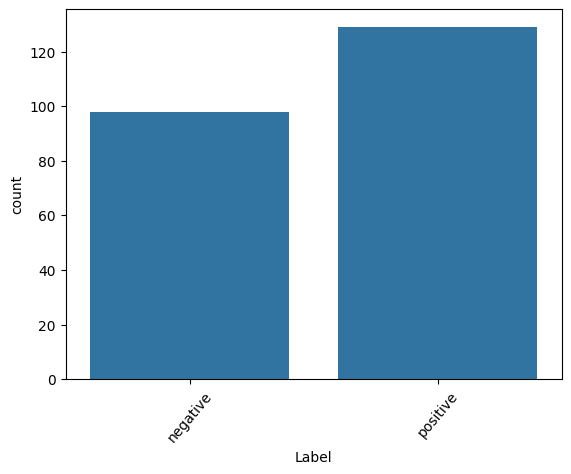

In [32]:
sns.countplot(
    x=dataframe["Label"]
)

plt.xticks(
    rotation=50
)

# Dataset splitting

Eng: Preparing the data for machine learning manipulations.

---

Ukr: Підготовка даних для маніпуляцій з машинним навчанням.

## Preprocessing variables

In [39]:
data_dir = images_dataset

batch_size = 32
target_size = (224, 224)
validation_split = 0.2

## Importing modules

In [40]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Train && validation

In [42]:
train = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size
)

validation = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size
)

Found 227 files belonging to 2 classes.
Using 182 files for training.
Found 227 files belonging to 2 classes.
Using 45 files for validation.


In [44]:
class_names = train.class_names
class_names

['negative', 'positive']

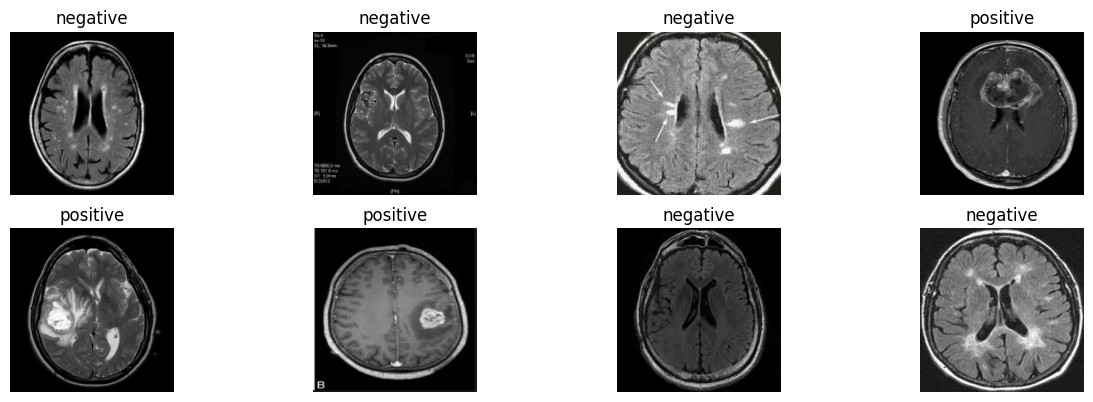

In [55]:
plt.figure(
    figsize=(15, 20)
)

for images, labels in train.take(1):
    for _ in range(8):
        ax = plt.subplot(
            8, 4, _ + 1
        )
        plt.imshow(images[_].numpy().astype(
            "uint8"
        ))

        plt.title(
            class_names[labels[_]]
        )
        plt.axis("off")

# Modeling